In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt

import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
from SplineEncodingModel.LinearRegressionSpline import EncodingModel

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
mouse = '4139265.3'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


MouseName  DateFolder  SessionNumber              Track  RewardCount  \
1403  4139265.3  10_02_2019              1  TwoTower_foraging           60   
1405  4139265.3  10_02_2019              3  TwoTower_foraging           60   
1433  4139265.3  12_02_2019              2  TwoTower_foraging           90   
1455  4139265.3  15_02_2019              4  TwoTower_foraging           72   
1475  4139265.3  17_02_2019              2  TwoTower_foraging           81   
1495  4139265.3  19_02_2019              2  TwoTower_foraging           92   
1513  4139265.3  21_02_2019              2  TwoTower_foraging           90   
1522  4139265.3  22_02_2019              2  TwoTower_foraging           90   
1531  4139265.3  23_02_2019              2  TwoTower_foraging           93   
1537  4139265.3  24_02_2019              2  TwoTower_foraging           97   

      Imaging ImagingRegion   DateTime  \
1403        1           CA1 2019-02-10   
1405        1           CA1 2019-02-10   
1433        1           CA1 2019-02-12   
1455        1           CA1 2019-02-15   
1475        1           CA1 2019-02-17   
1495        1           CA1 2019-02-19   
1513        1           CA1 2019-02-21   
1522        1           CA1 2019-02-22   
1531        1           CA1 2019-02-23   
1537        1           CA1 2019-02-24   

                                              data file scanfile  \
1403  G:\My Drive\VR_Data\TwoTower\4139265.3\10_02_2...     None   
1405  G:\My Drive\VR_Data\TwoTower\4139265.3\10_02_2...     None   
1433  G:\My Drive\VR_Data\TwoTower\4139265.3\12_02_2...     None   
1455  G:\My Drive\VR_Data\TwoTower\4139265.3\15_02_2...     None   
1475  G:\My Drive\VR_Data\TwoTower\4139265.3\17_02_2...     None   
1495  G:\My Drive\VR_Data\TwoTower\4139265.3\19_02_2...     None   
1513  G:\My Drive\VR_Data\TwoTower\4139265.3\21_02_2...     None   
1522  G:\My Drive\VR_Data\TwoTower\4139265.3\22_02_2...     None   
1531  G:\My Drive\VR_Data\TwoTower\4139265.3\23_02_2...     None   
1537  G:\My Drive\VR_Data\TwoTower\4139265.3\24_02_2...     None   

                                                scanmat  \
1403  G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...   
1405  G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...   
1433  G:\My Drive\2P_Data\TwoTower\4139265.3\12_02_2...   
1455  G:\My Drive\2P_Data\TwoTower\4139265.3\15_02_2...   
1475  G:\My Drive\2P_Data\TwoTower\4139265.3\17_02_2...   
1495  G:\My Drive\2P_Data\TwoTower\4139265.3\19_02_2...   
1513  G:\My Drive\2P_Data\TwoTower\4139265.3\21_02_2...   
1522  G:\My Drive\2P_Data\TwoTower\4139265.3\22_02_2...   
1531  G:\My Drive\2P_Data\TwoTower\4139265.3\23_02_2...   
1537  G:\My Drive\2P_Data\TwoTower\4139265.3\24_02_2...   

                                              s2pfolder  
1403  G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...  
1405  G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...  
1433  G:\My Drive\2P_Data\TwoTower\4139265.3\12_02_2...  
1455  G:\My Drive\2P_Data\TwoTower\4139265.3\15_02_2...  
1475  G:\My Drive\2P_Data\TwoTower\4139265.3\17_02_2...  
1495  G:\My Drive\2P_Data\TwoTower\4139265.3\19_02_2...  
1513  G:\My Drive\2P_Data\TwoTower\4139265.3\21_02_2...  
1522  G:\My Drive\2P_Data\TwoTower\4139265.3\22_02_2...  
1531  G:\My Drive\2P_Data\TwoTower\4139265.3\23_02_2...  
1537  G:\My Drive\2P_Data\TwoTower\4139265.3\24_02_2...

In [3]:
sess = df_mouse.iloc[-1]

In [4]:
VRDat,C, S, A = pp.load_scan_sess(sess)

num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [5]:
C=u.nansmooth(C,[5,0])
C/=C.mean(axis=0).reshape(1,-1)
S/=S.mean(axis=0).reshape(1,-1)
Ssm = sp.ndimage.filters.gaussian_filter1d(S,5,axis=0)

In [6]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
effMorph =VRDat.morph._values+VRDat.bckgndJitter._values + VRDat.wallJitter._values
effMorph = (effMorph-np.amin(effMorph))/(np.amax(effMorph)-np.amin(effMorph)+.01)+.001

In [74]:
posmask = (VRDat.pos>0) & (VRDat.pos<450)

C_model = C[posmask,:]
S_model=Ssm[posmask,:]
pos_model = VRDat.pos._values[posmask]
effMorph_model = effMorph[posmask]



trainmask = np.zeros(C_model.shape[0])
# inds = np.random.permutation(C_model.shape[0])[:int(.7*C_model.shape[0])]
# trainmask[inds] +=1
trainmask[:int(.7*C_model.shape[0])]+=1
trainmask = trainmask>0


In [65]:

splmdl = EncodingModel(ops={'n_ctrl_pts_morph':3,'n_ctrl_pts_pos':5})
X_train = splmdl.make_design_matrix(pos_model[trainmask],effMorph_model[trainmask])
X_test = splmdl.make_design_matrix(pos_model[~trainmask],effMorph_model[~trainmask])

(7,)


In [67]:
splmdl.fit_linear(X_train,C_model[trainmask,:])

In [68]:
Y= splmdl.predict_linear(X_test)

In [69]:
print(Y.shape)

(6398, 1634)


In [70]:
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,speed=VRDat.speed._values)
S_trial_mat[np.isnan(S_trial_mat)]=0
S_trial_mat = sp.ndimage.filters.gaussian_filter1d(S_trial_mat,1,axis=1)
tmp = trial_info['morphs'] +  trial_info['wallJitter'] + trial_info['bckgndJitter']
msort = np.argsort(tmp)

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

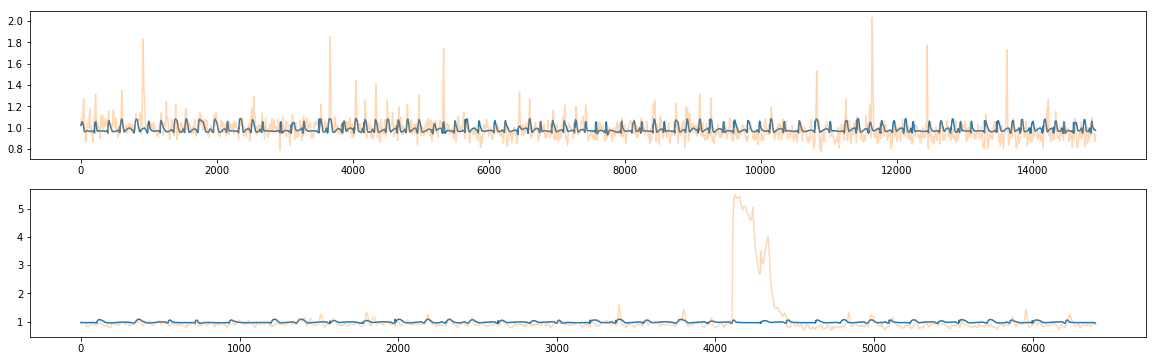

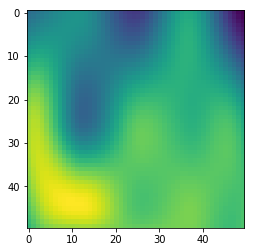

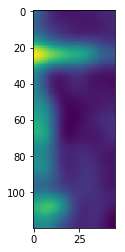

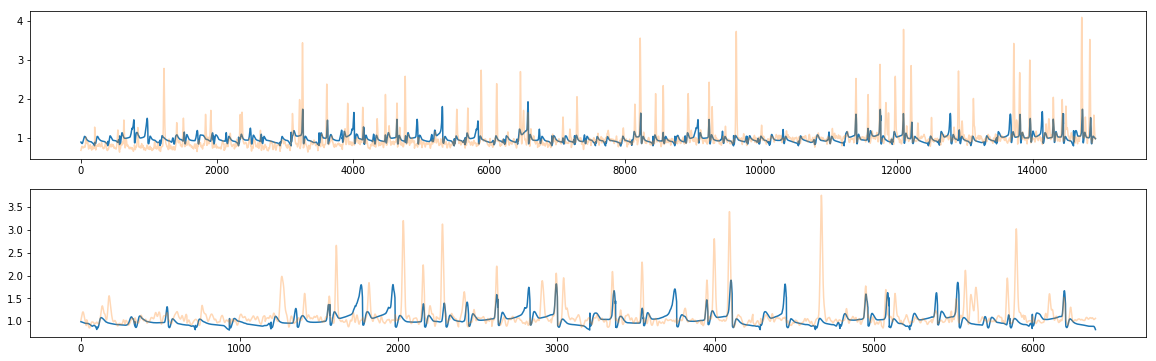

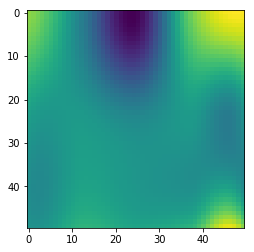

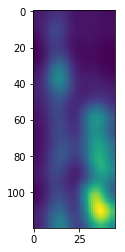

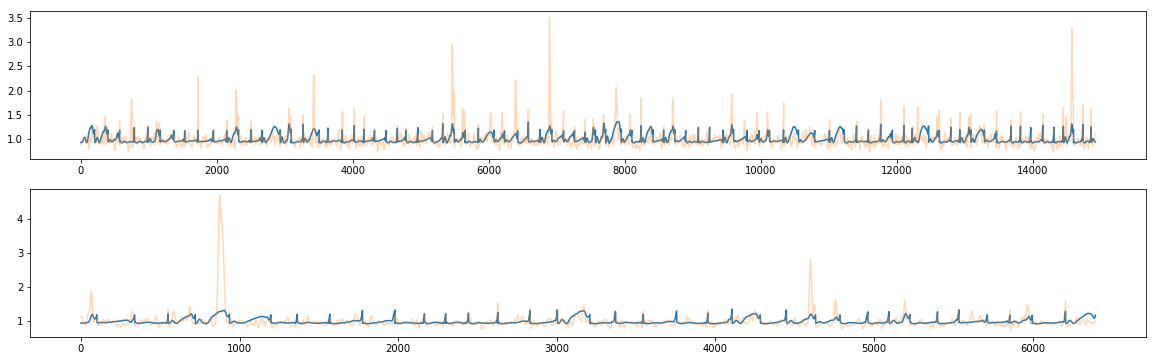

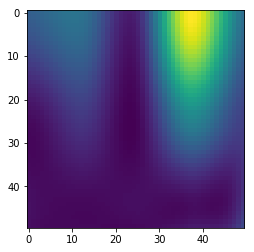

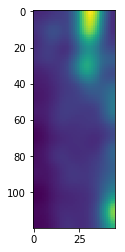

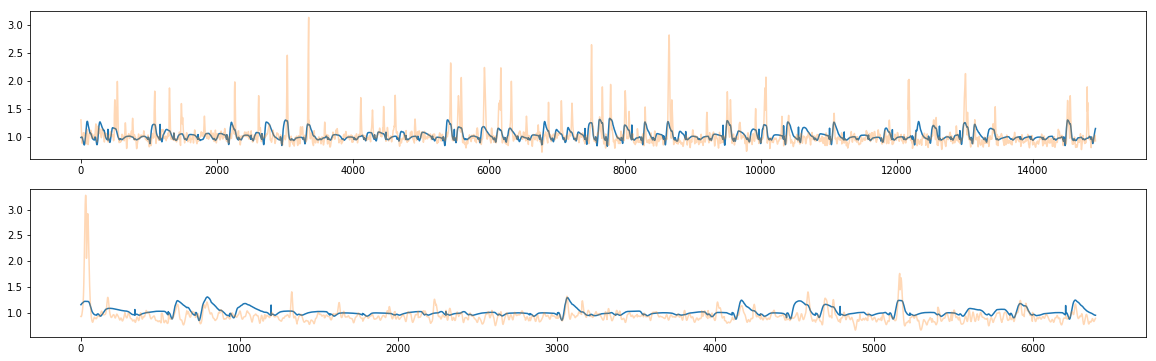

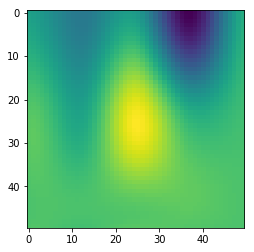

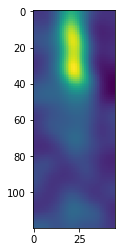

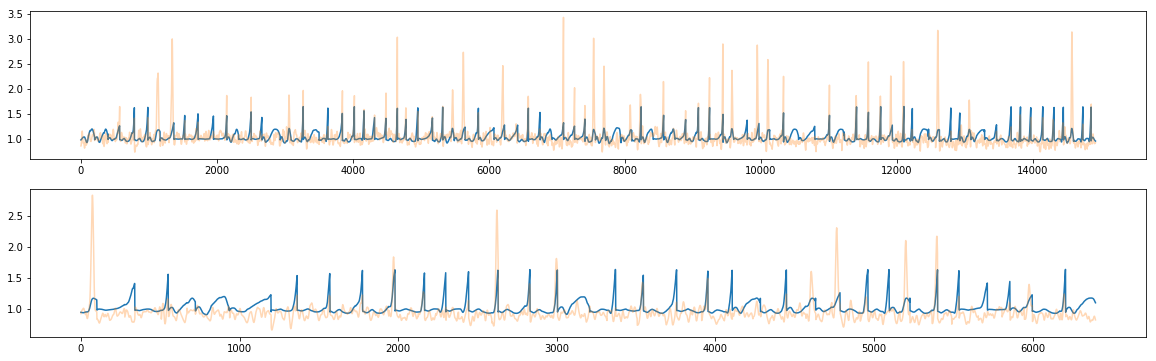

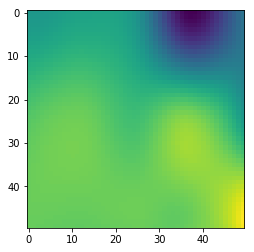

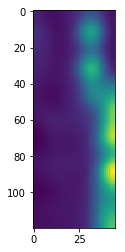

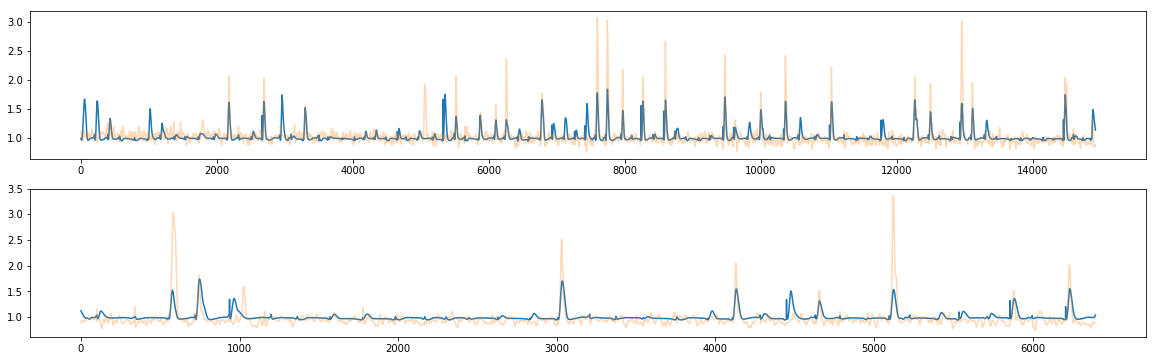

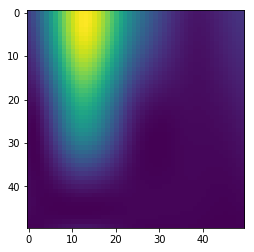

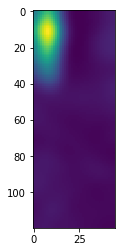

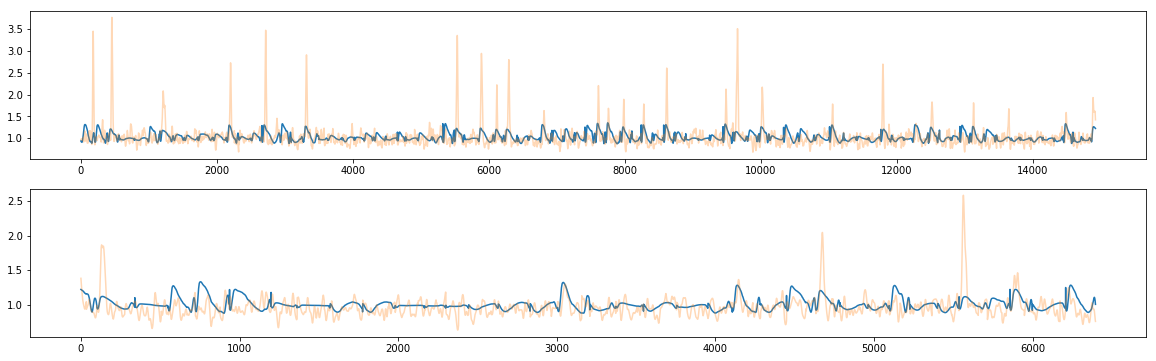

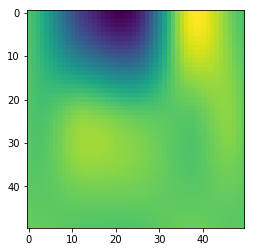

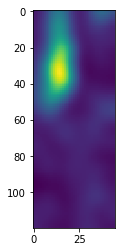

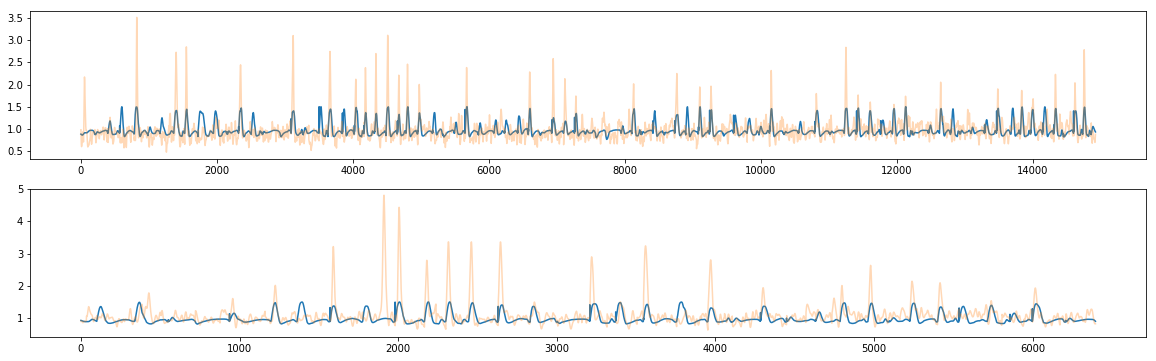

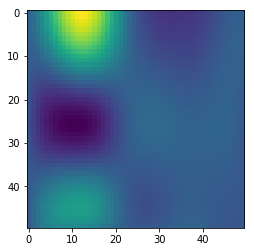

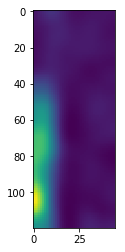

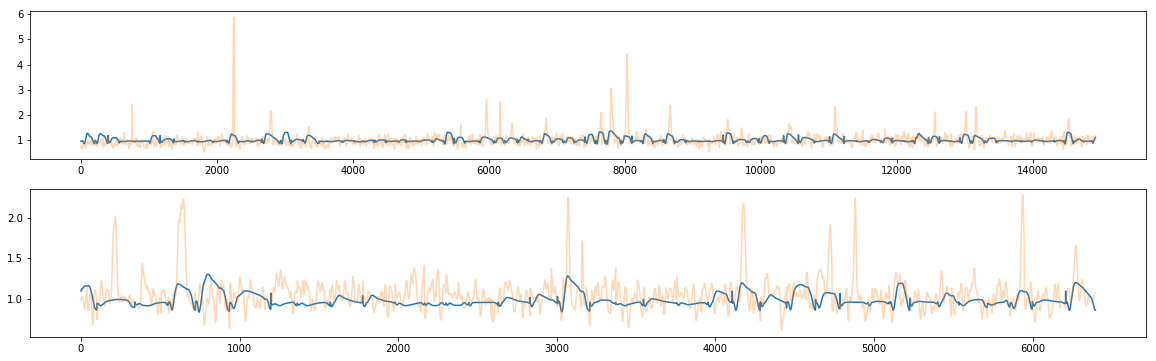

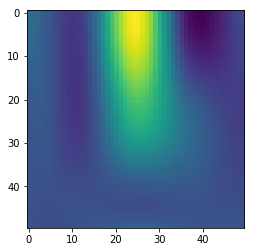

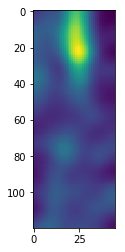

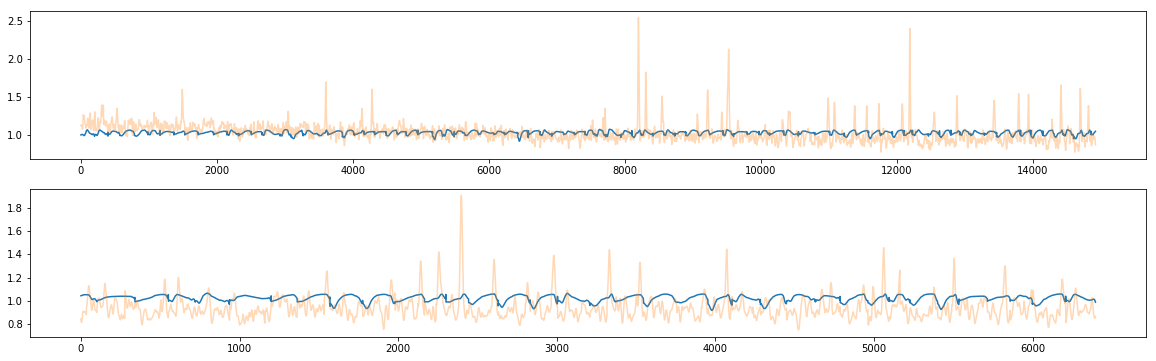

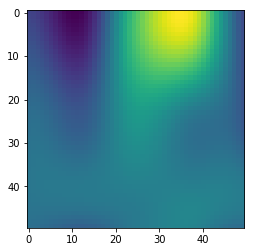

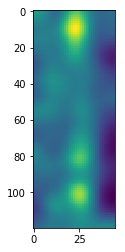

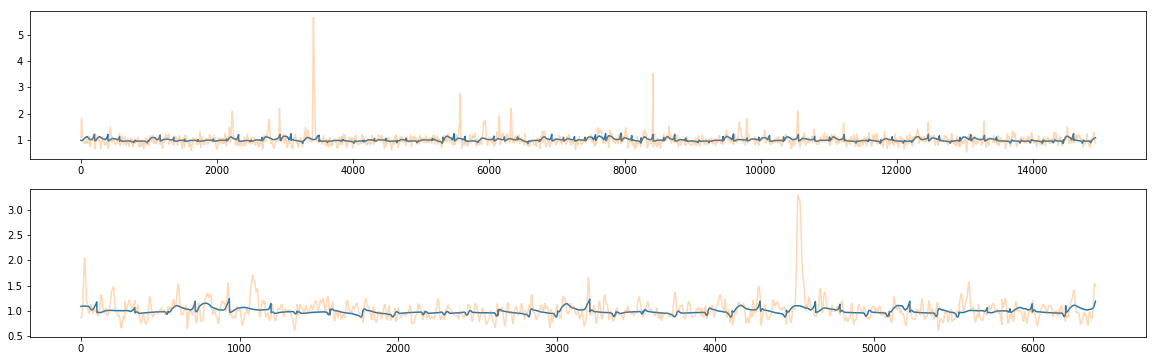

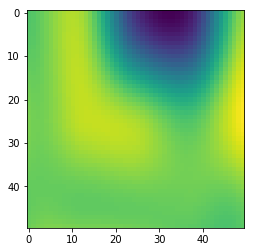

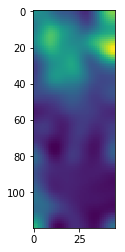

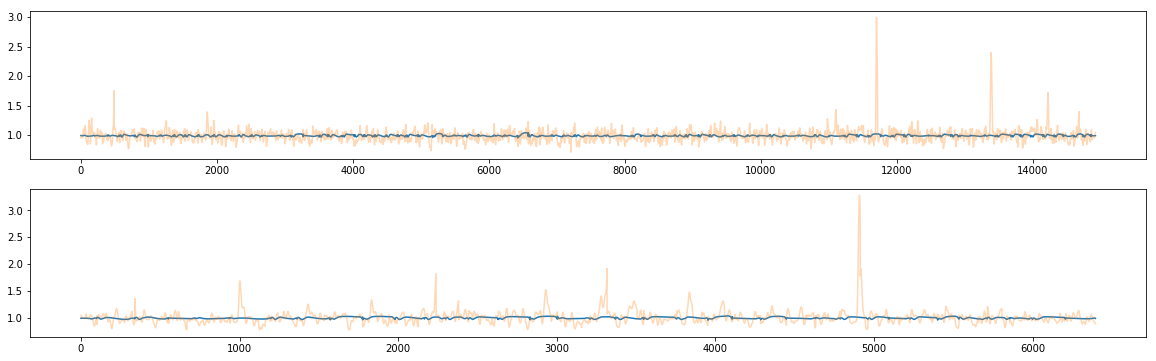

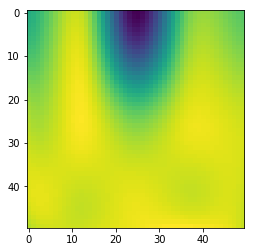

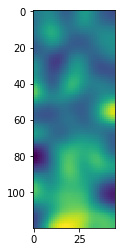

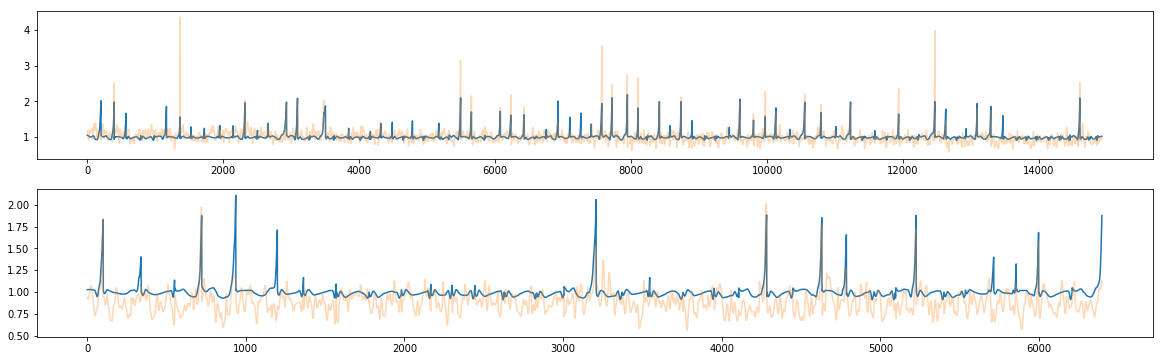

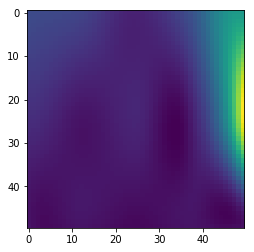

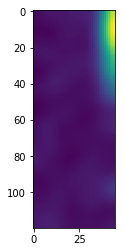

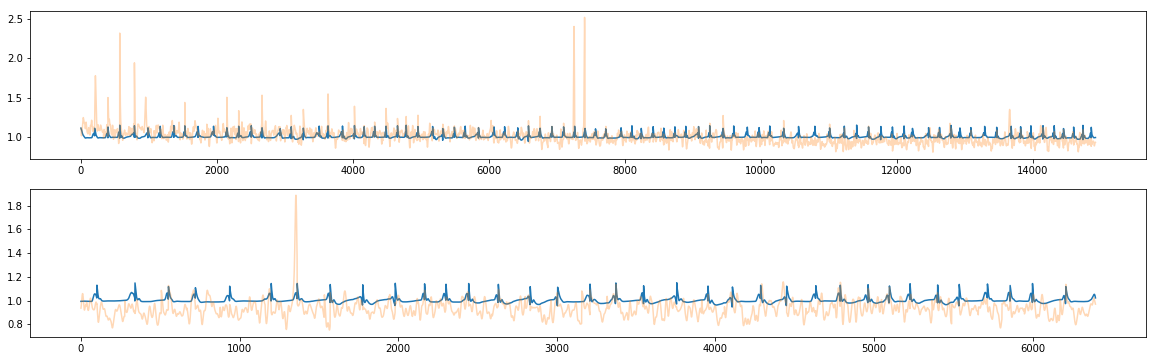

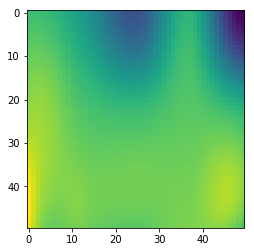

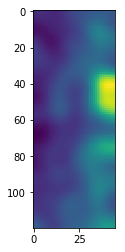

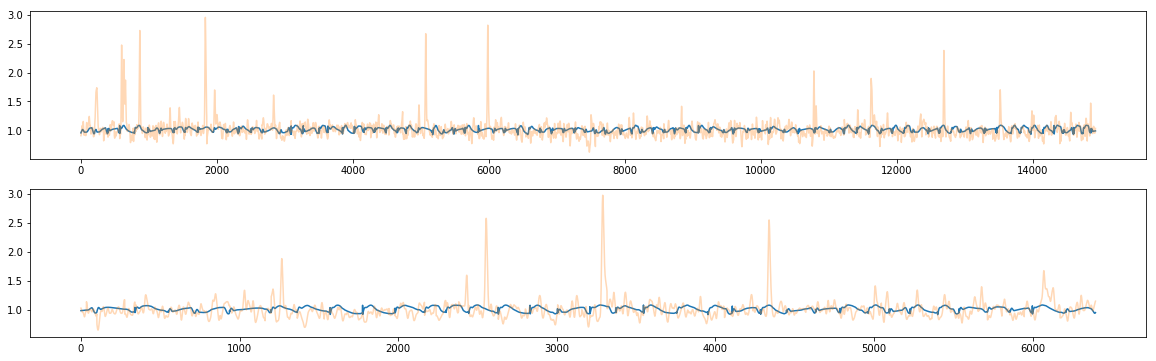

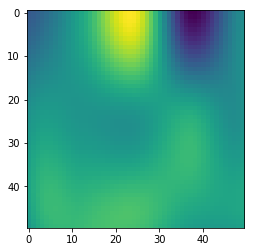

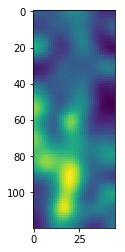

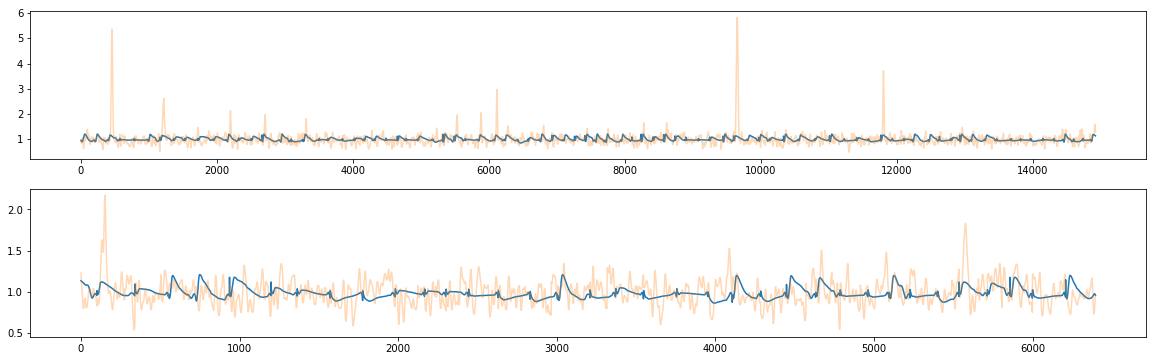

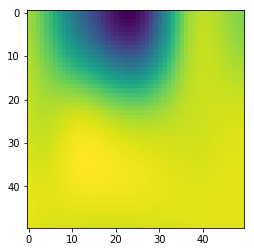

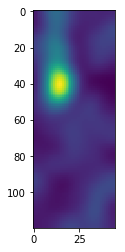

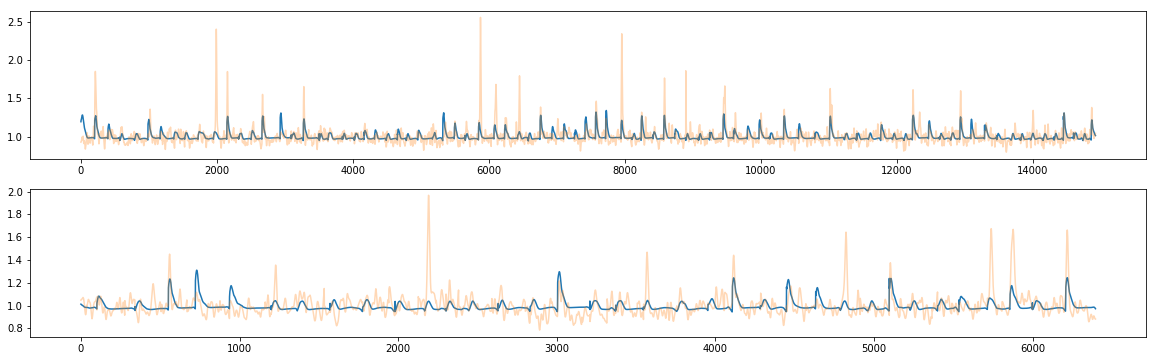

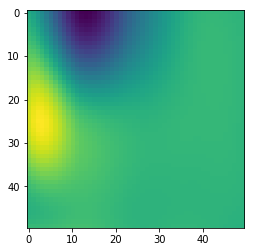

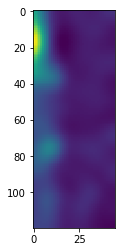

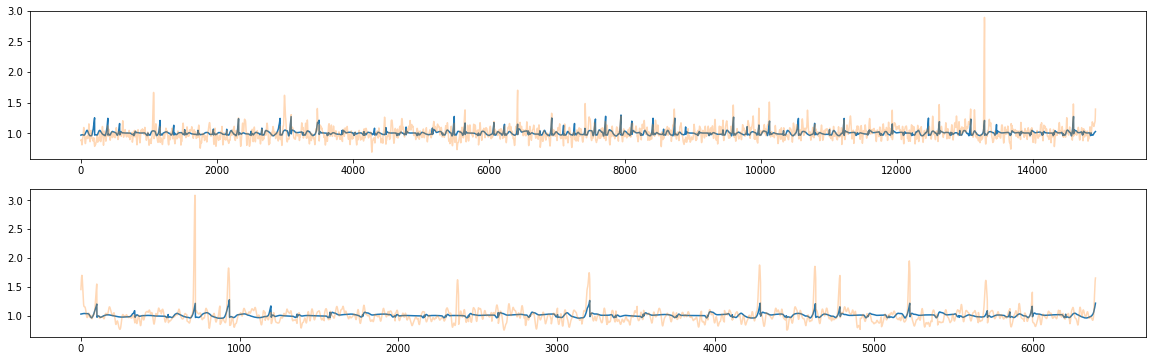

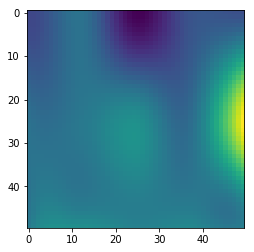

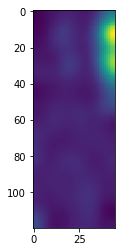

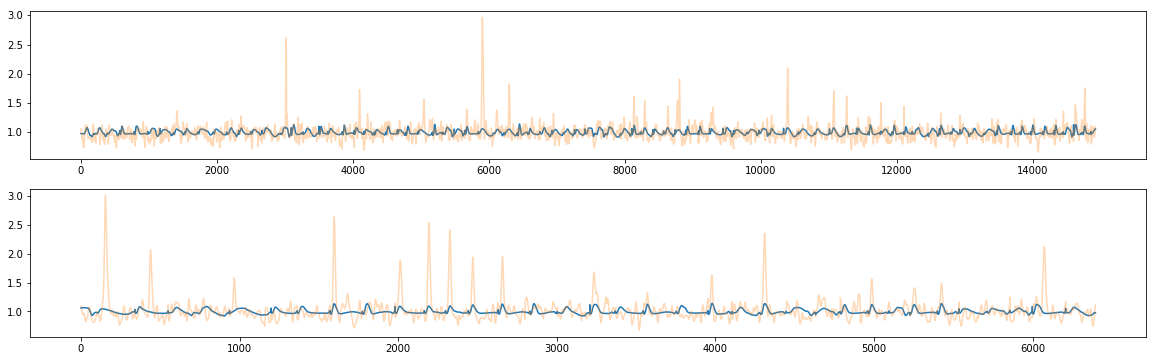

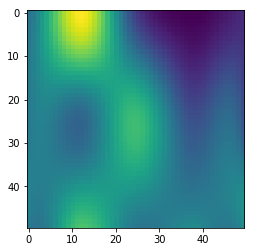

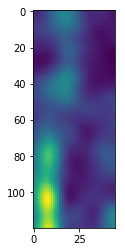

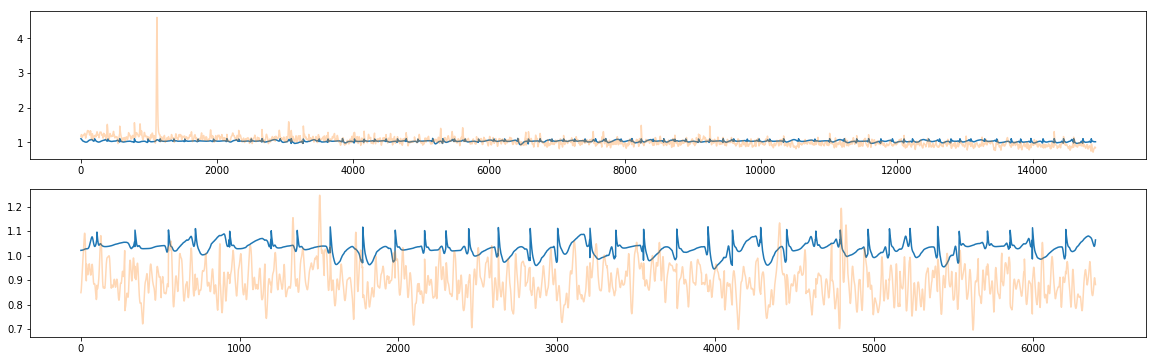

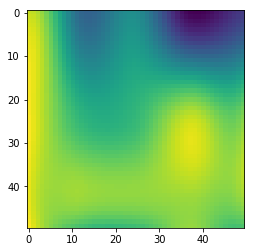

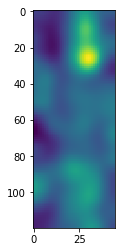

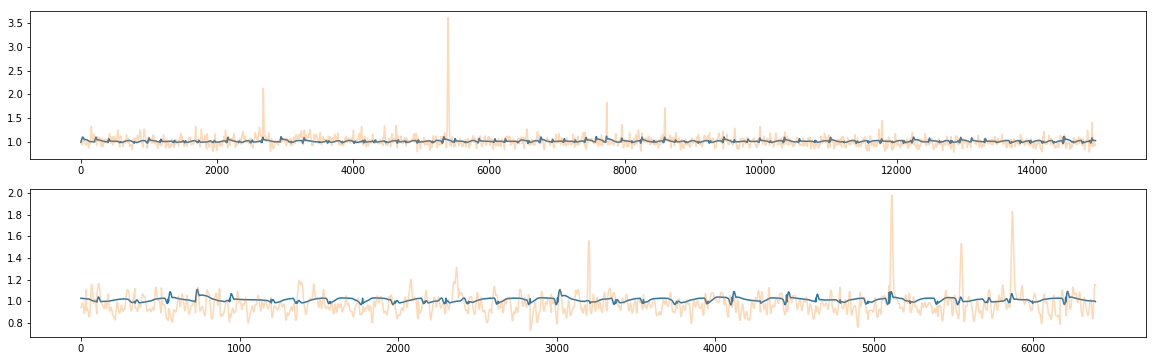

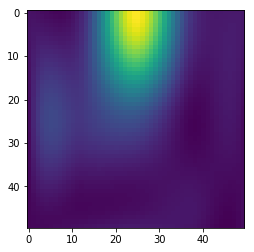

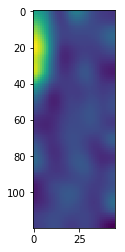

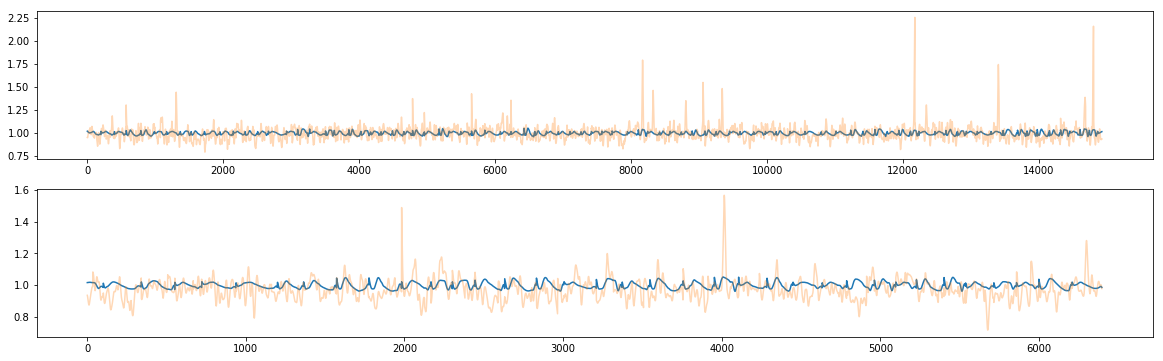

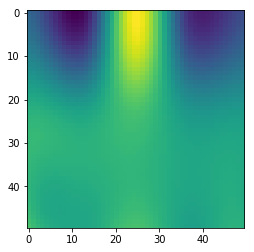

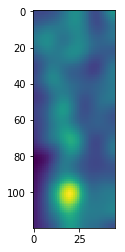

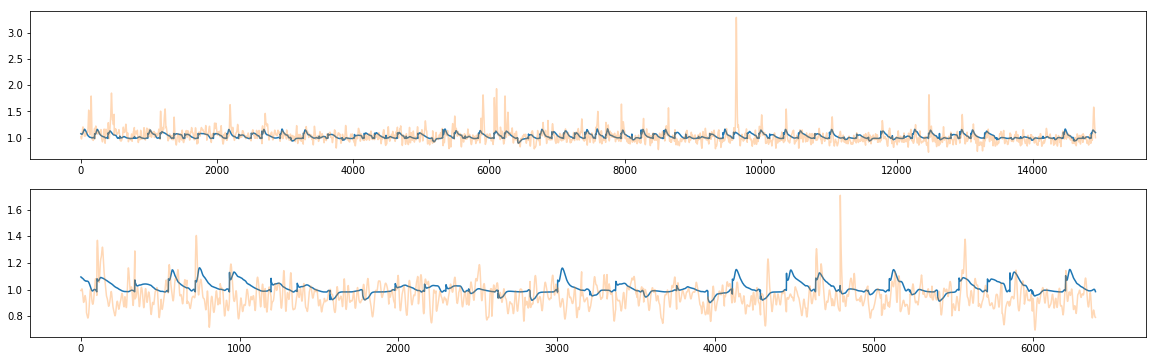

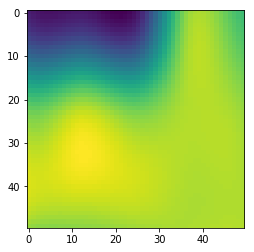

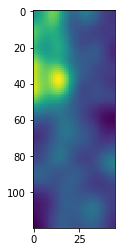

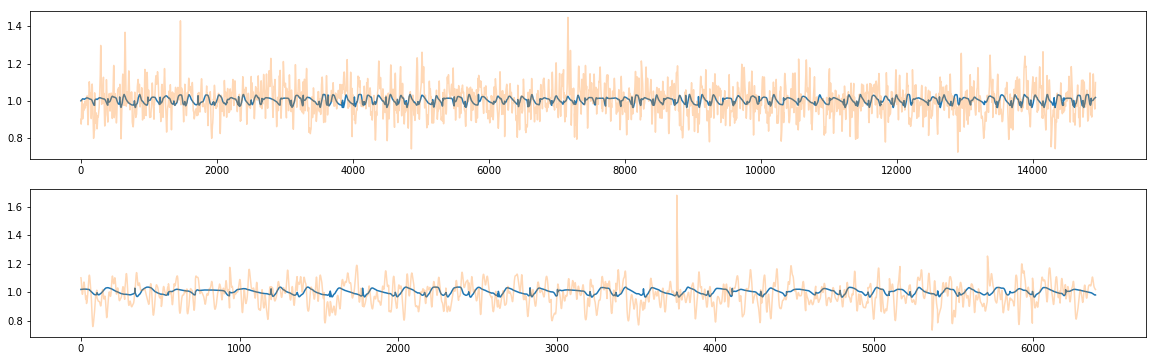

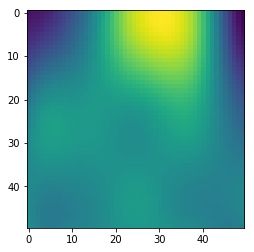

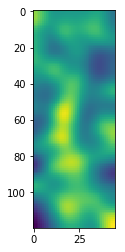

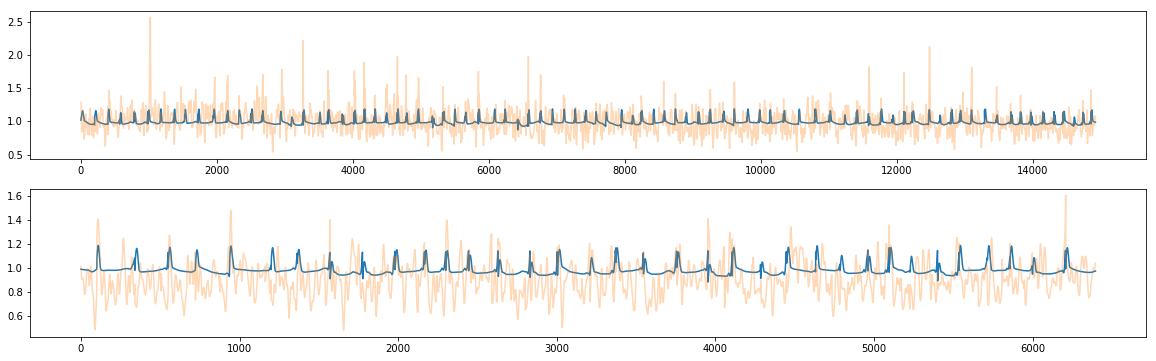

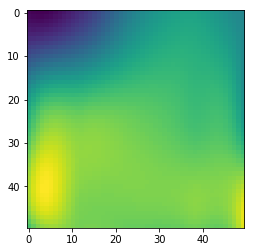

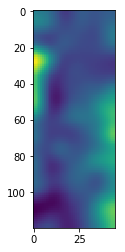

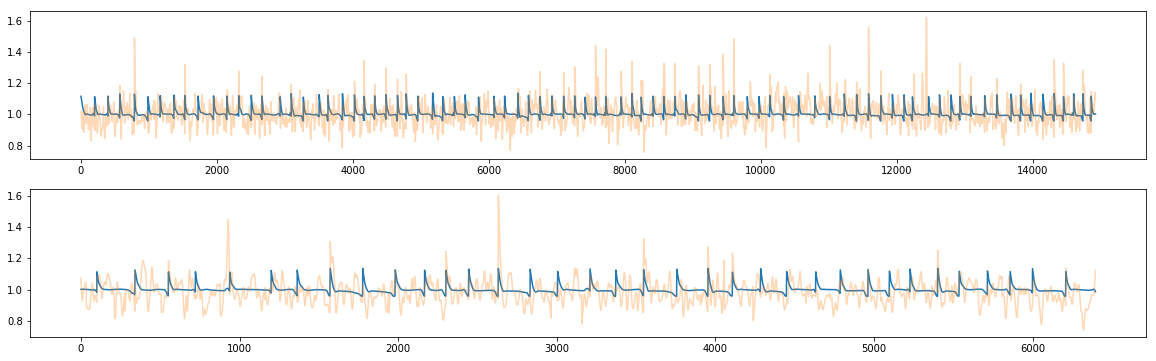

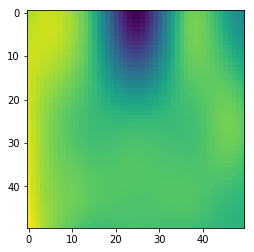

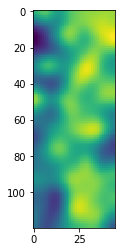

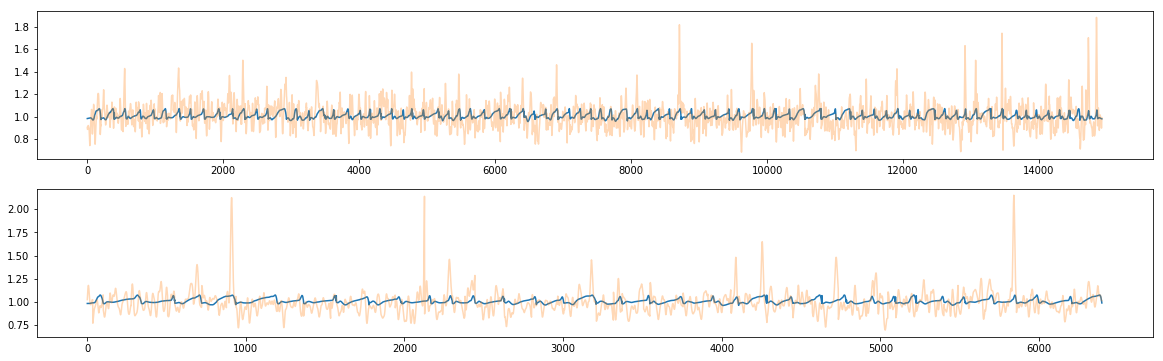

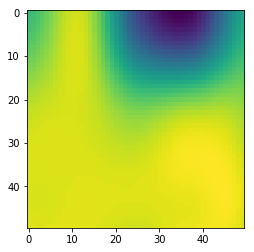

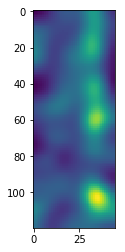

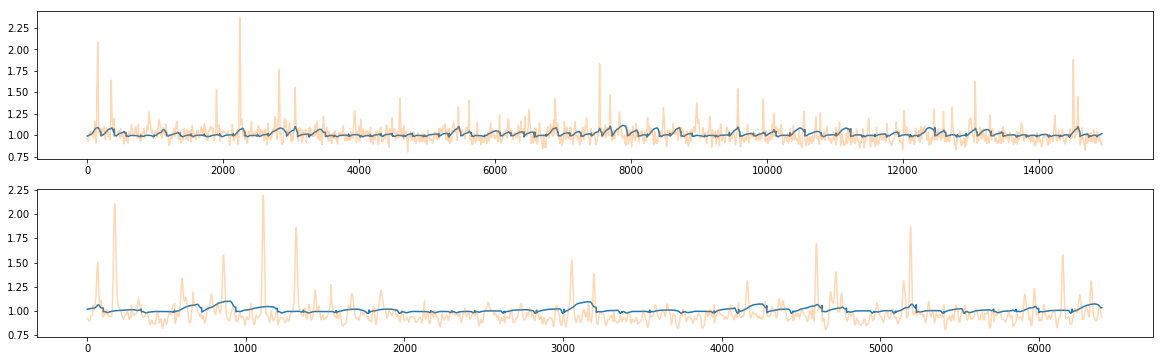

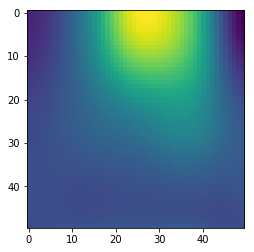

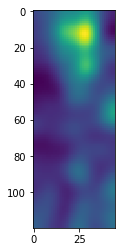

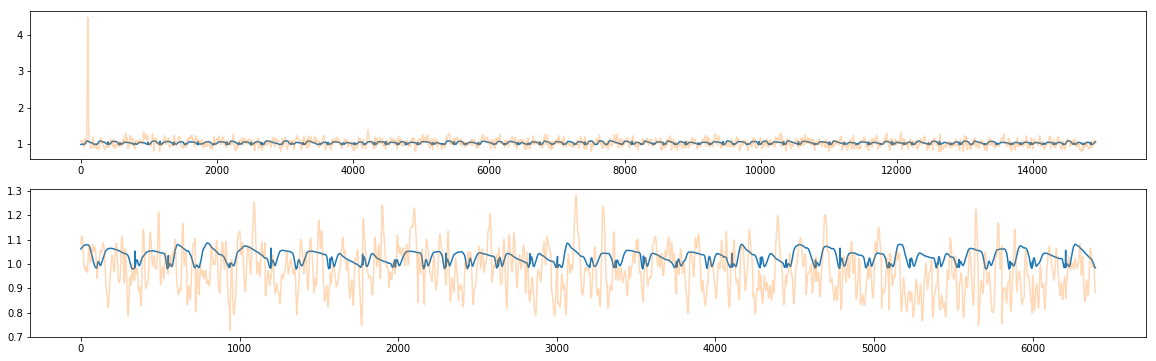

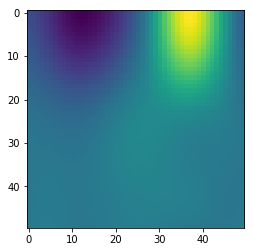

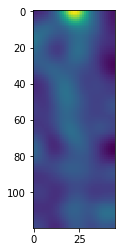

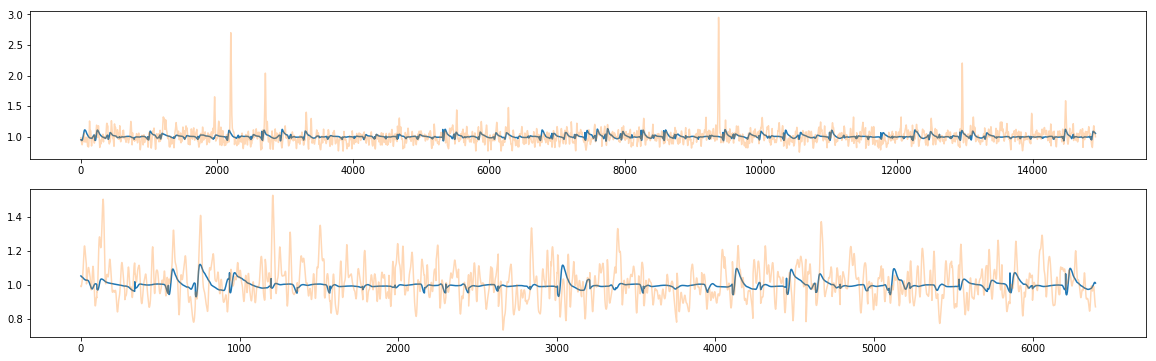

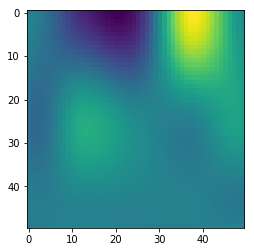

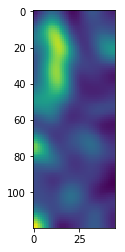

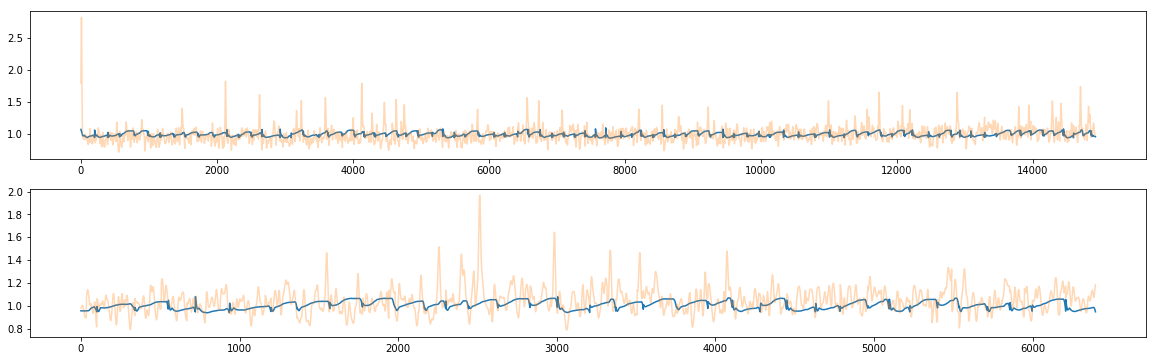

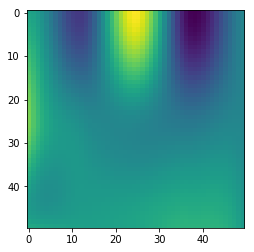

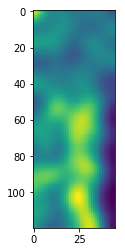

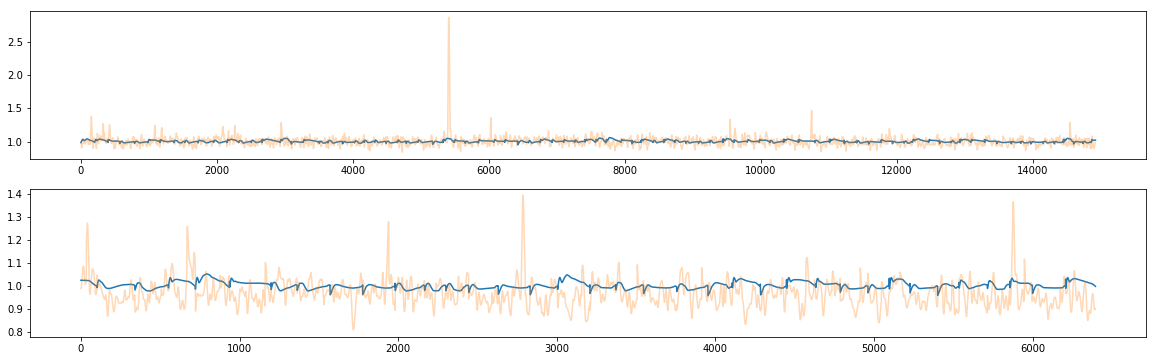

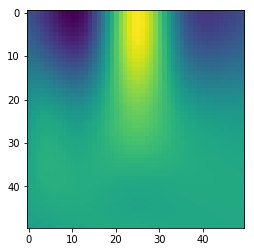

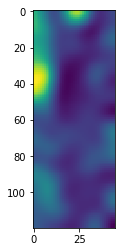

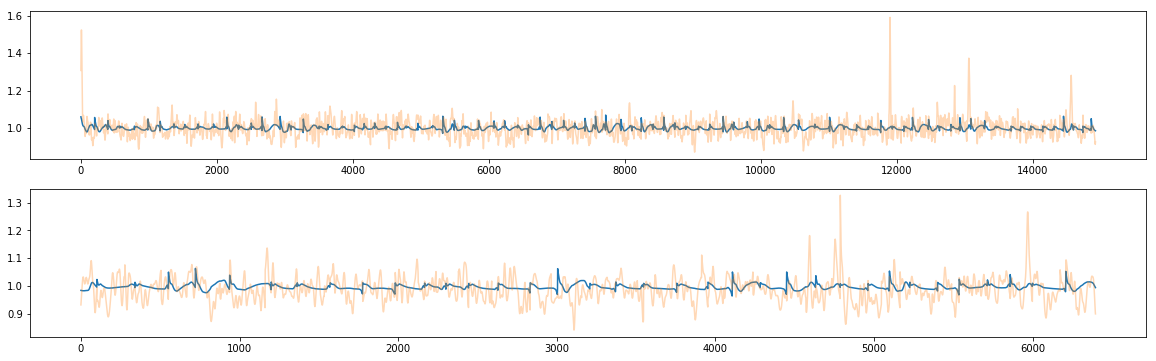

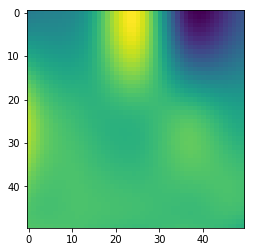

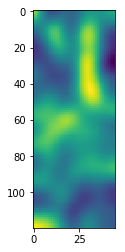

In [73]:

for cell in range(1,C.shape[1],50):
    f,ax = plt.subplots(2,1,figsize=[20,6])
    splmdl.fit_linear(X_train,C_model[trainmask,cell])
    Y_train= splmdl.predict_linear(X_train)
    Y_test = splmdl.predict_linear(X_test)
    ax[0].plot(Y_train,alpha=1)
    ax[0].plot(C_model[trainmask,cell],alpha=.3)
    
    ax[1].plot(Y_test,alpha=1)
    ax[1].plot(C_model[~trainmask,cell],alpha=.3)
    
    
    
    posmat = np.linspace(0.01,449.9).reshape([1,-1])*np.ones([50,1])
    morphmat = np.linspace(0.01,.99).reshape([-1,1])*np.ones([1,50])
    Xplot= splmdl.make_design_matrix(posmat.reshape([-1,]),morphmat.reshape([-1,]))
#     print(posmat.reshape([-1,]),morphmat.reshape([-1,]))
    filt = splmdl.predict_linear(Xplot).reshape([50,50])
    f,ax = plt.subplots()
#     #ax.plot(filt)
    ax.imshow(filt)
# #     f,ax = plt.subplots()
# #     ax.imshow()
    
    f,ax = plt.subplots()
    ax.imshow(sp.ndimage.filters.gaussian_filter(S_trial_mat[msort,:,cell],[5,5]),aspect='equal') #vmax=np.percentile(S_trial_mat[msort,:,cell],90)
    

In [47]:
cell=60
splmdl.fit_poisson(X,S[posmask,cell],alpha=0)

Optimization terminated successfully.
         Current function value: 19944.960355
         Iterations: 33
         Function evaluations: 80
         Gradient evaluations: 112
         Hessian evaluations: 33


(5,)
         Current function value: 20180.894896
         Iterations: 18
         Function evaluations: 48
         Gradient evaluations: 54
         Hessian evaluations: 19
(5,)
         Current function value: 19790.765551
         Iterations: 16
         Function evaluations: 37
         Gradient evaluations: 41
         Hessian evaluations: 17
(5,)
         Current function value: 20598.636954
         Iterations: 14
         Function evaluations: 35
         Gradient evaluations: 37
         Hessian evaluations: 15
(5,)
         Current function value: 18515.596389
         Iterations: 22
         Function evaluations: 53
         Gradient evaluations: 63
         Hessian evaluations: 23
(5,)
Optimization terminated successfully.
         Current function value: 20519.471974
         Iterations: 27
         Function evaluations: 33
         Gradient evaluations: 59
         Hessian evaluations: 27
(5,)
         Current function value: 15594.850764
         Iterations: 19
       

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


         Current function value: 17247.322107
         Iterations: 18
         Function evaluations: 44
         Gradient evaluations: 50
         Hessian evaluations: 19
(5,)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Optimization terminated successfully.
         Current function value: 20791.162238
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 54
         Hessian evaluations: 25
(5,)
         Current function value: 21147.231552
         Iterations: 14
         Function evaluations: 35
         Gradient evaluations: 37
         Hessian evaluations: 15
(5,)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


         Current function value: 21116.554801
         Iterations: 16
         Function evaluations: 38
         Gradient evaluations: 42
         Hessian evaluations: 17
(5,)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Optimization terminated successfully.
         Current function value: 19885.024720
         Iterations: 26
         Function evaluations: 34
         Gradient evaluations: 59
         Hessian evaluations: 26
(5,)
Optimization terminated successfully.
         Current function value: 21184.694517
         Iterations: 23
         Function evaluations: 28
         Gradient evaluations: 50
         Hessian evaluations: 23
(5,)
Optimization terminated successfully.
         Current function value: 21061.176934
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 47
         Hessian evaluations: 22
(5,)
         Current function value: 20334.083891
         Iterations: 12
         Function evaluations: 35
         Gradient evaluations: 35
         Hessian evaluations: 13
(5,)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Optimization terminated successfully.
         Current function value: 20567.080503
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 46
         Hessian evaluations: 22
(5,)
         Current function value: 20817.687888
         Iterations: 10
         Function evaluations: 36
         Gradient evaluations: 34
         Hessian evaluations: 11
(5,)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


         Current function value: 20512.747923
         Iterations: 18
         Function evaluations: 46
         Gradient evaluations: 52
         Hessian evaluations: 19


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


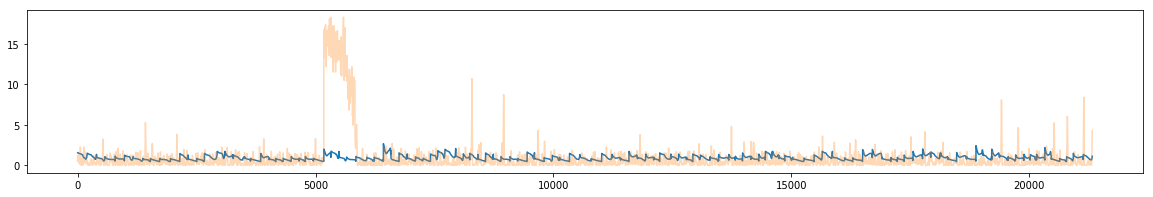

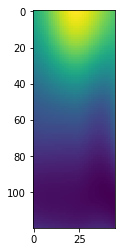

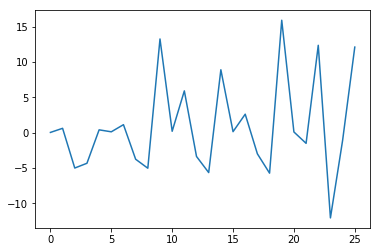

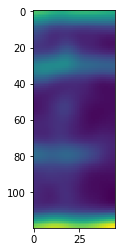

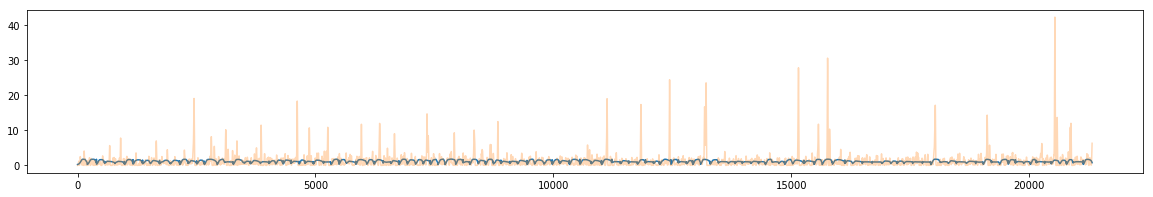

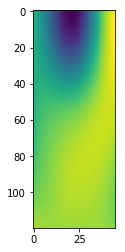

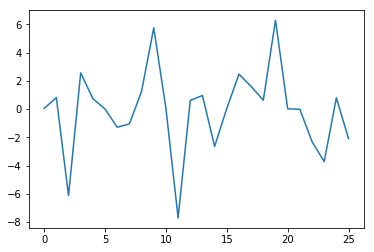

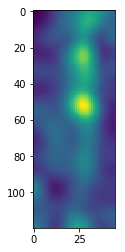

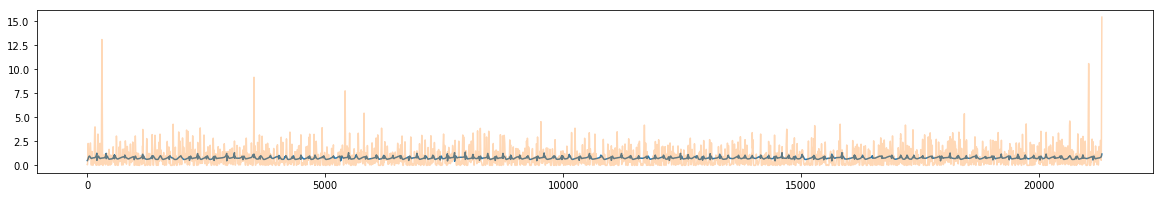

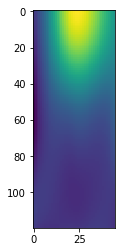

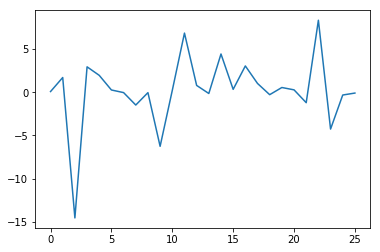

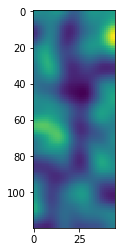

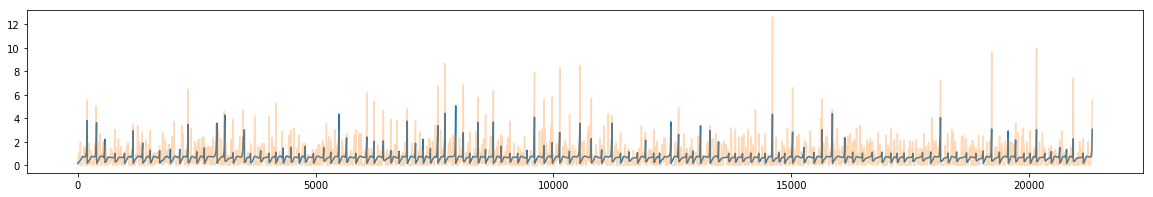

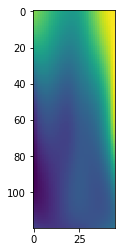

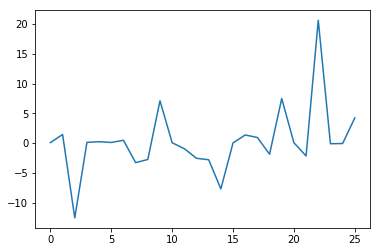

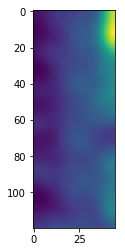

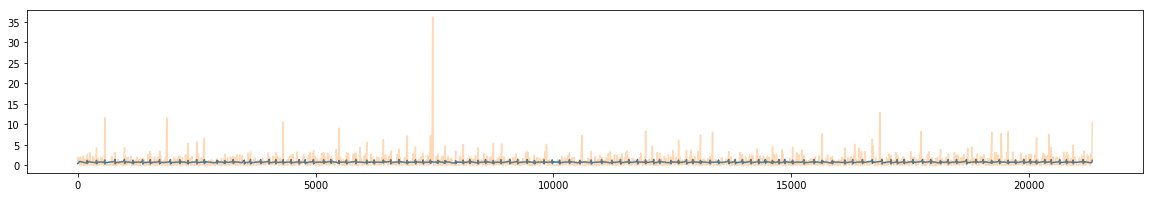

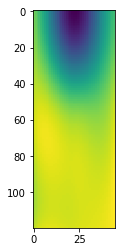

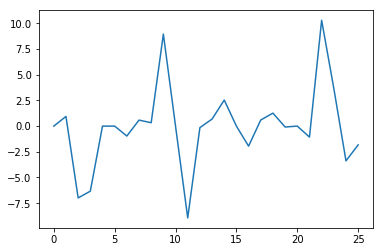

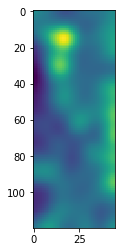

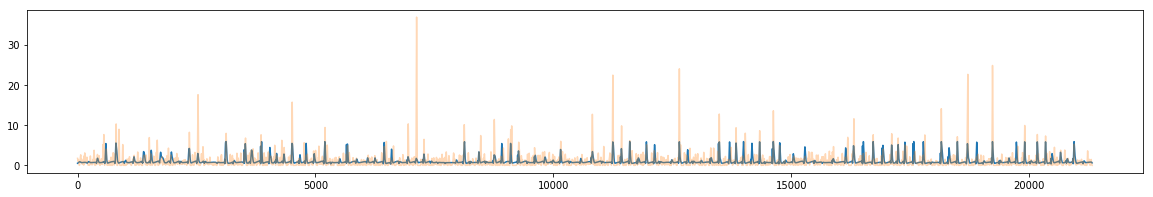

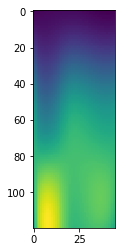

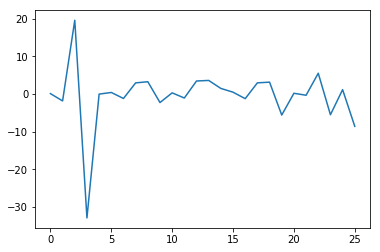

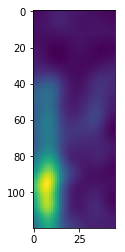

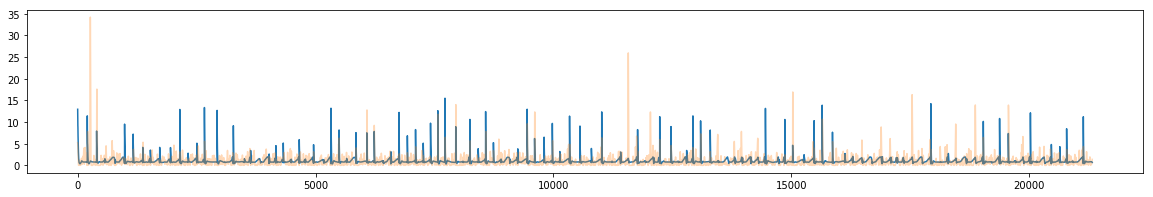

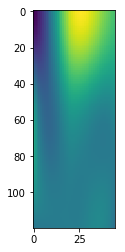

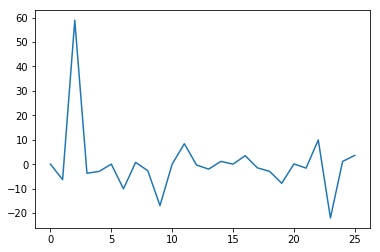

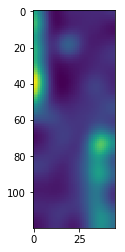

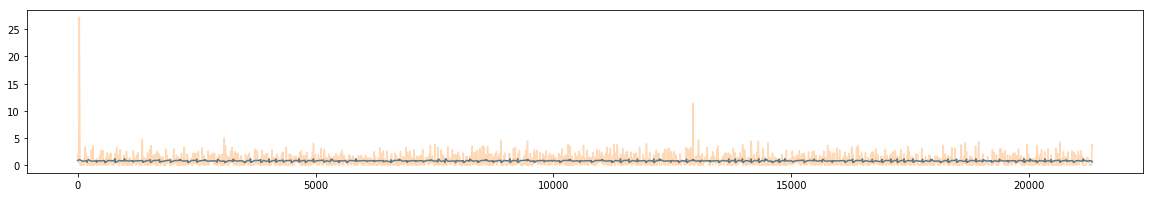

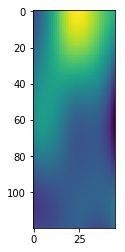

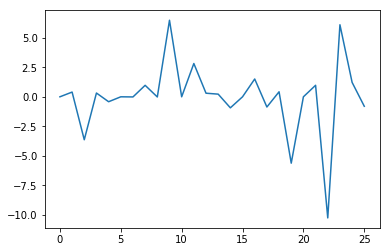

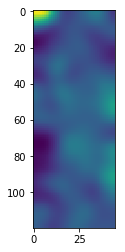

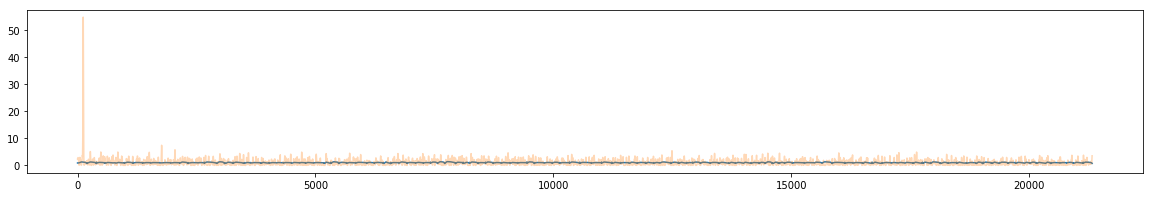

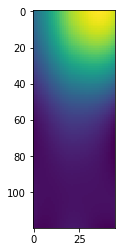

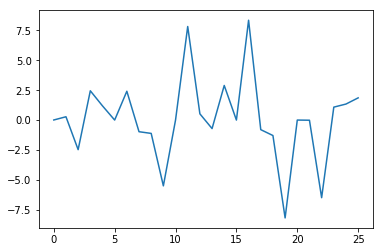

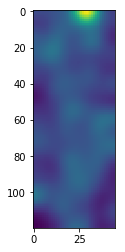

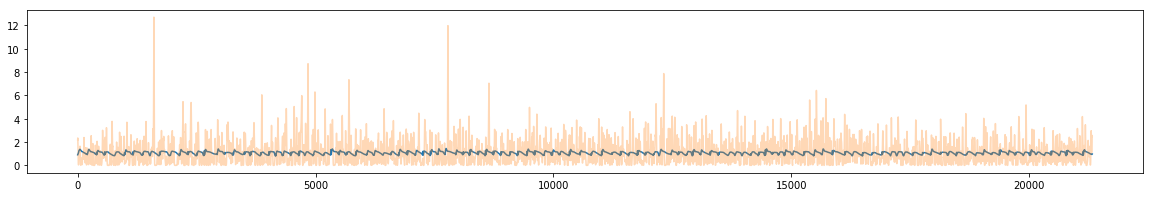

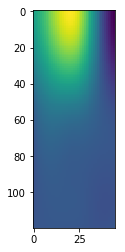

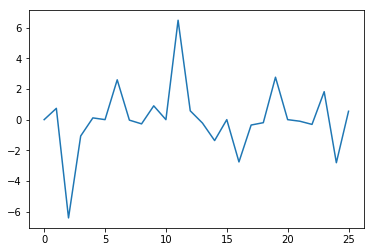

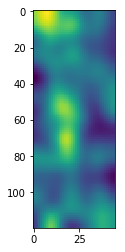

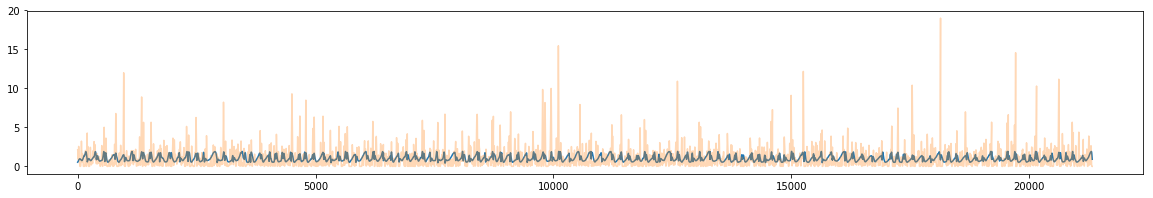

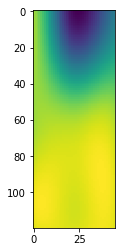

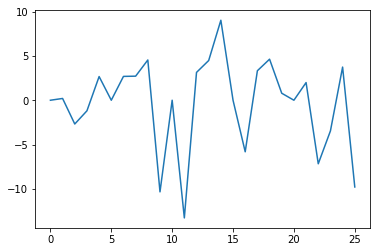

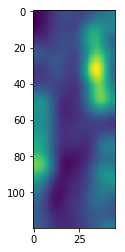

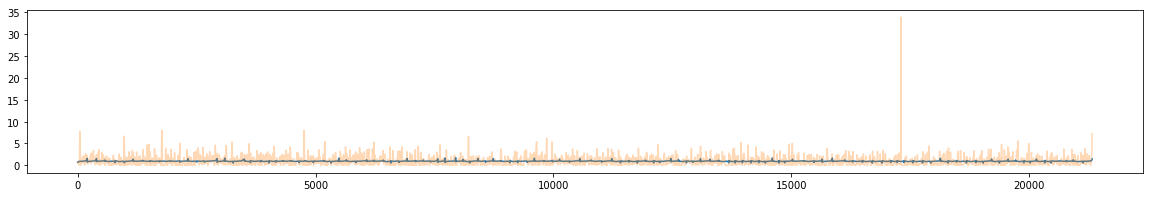

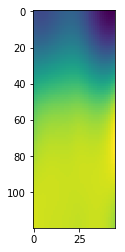

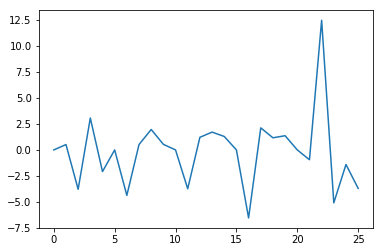

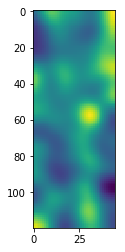

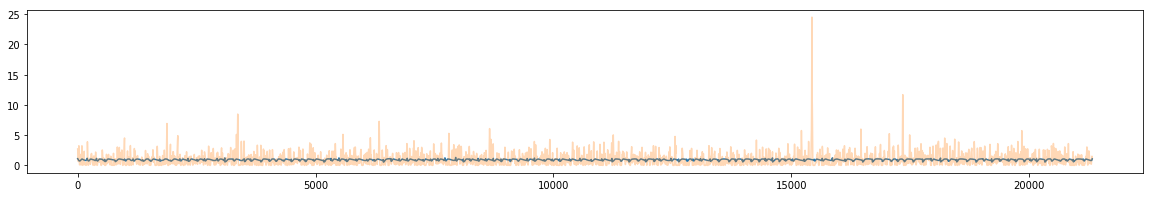

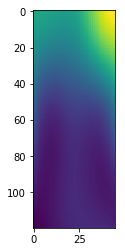

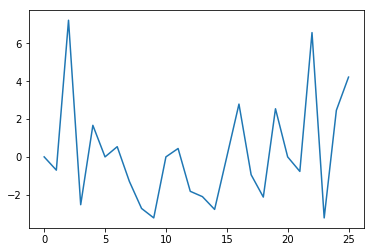

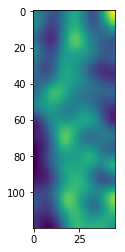

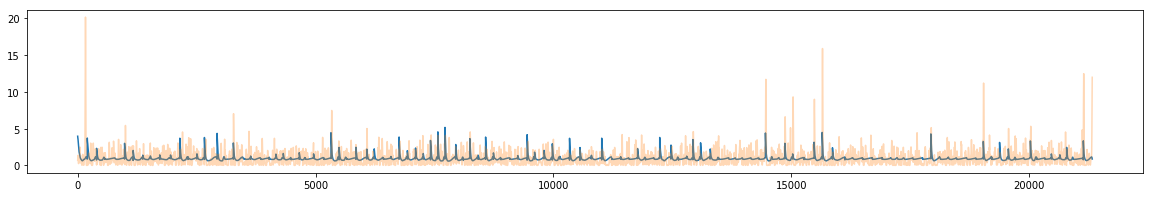

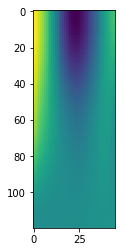

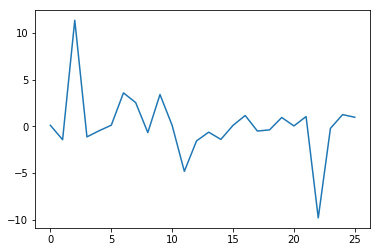

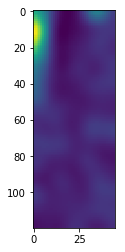

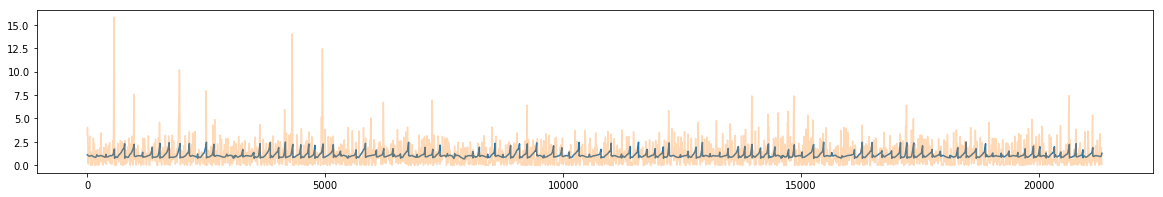

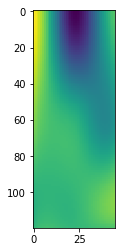

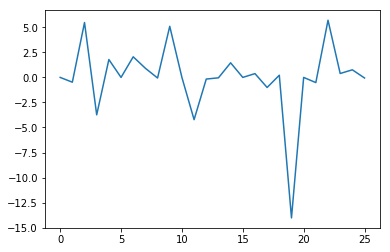

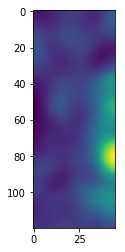

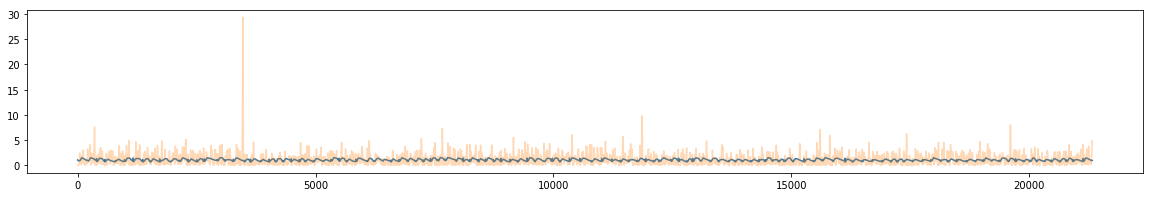

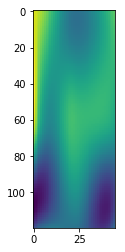

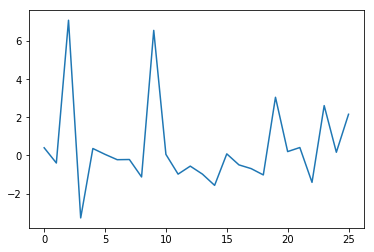

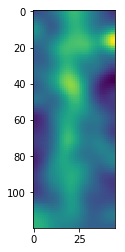

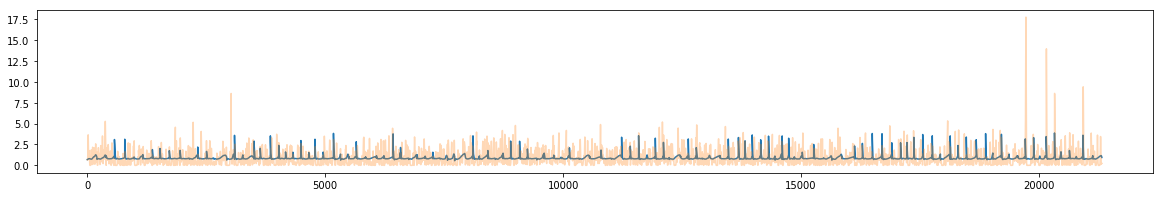

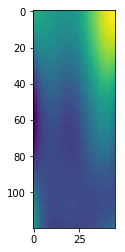

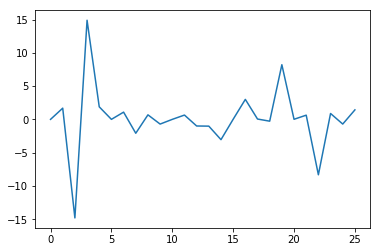

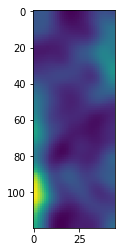

In [48]:
splmdl= None
for cell in range(0,S.shape[1],100):
    splmdl = EncodingModel(ops={'n_ctrl_pts_pos':3,'n_ctrl_pts_morph':5})
#     X_train = splmdl.make_design_matrix(,effMorph[posmask])
    splmdl.fit_poisson(X_train,S_model[trainmask,cell],alpha=0.1)
    Y_train = splmdl.predict_poisson(X_train)
    Y_test = splmdl.predict_poisson(X_test)
    f,ax = plt.subplots(2,1, figsize=[20,3])
    
    ax[0].plot(Y_train,alpha=1)
    ax[0].plot(S_model[trainmask,cell],alpha=.3)
    
    ax[1].plot(Y_test,alpha=1)
    ax[1].plot(S_model[~trainmask,cell],alpha=.3)
    
    posmat = np.linspace(0.01,449.9,num=S_trial_mat.shape[1]).reshape([1,-1])*np.ones([S_trial_mat.shape[0],1])
    morphmat = np.linspace(0.01,.99,num=S_trial_mat.shape[0]).reshape([-1,1])*np.ones([1,S_trial_mat.shape[1]])

    Xplot= splmdl.make_design_matrix(posmat.reshape([-1,]),morphmat.reshape([-1,]))
    filt = splmdl.predict_poisson(Xplot).reshape(S_trial_mat.shape[:-1])
    f,ax = plt.subplots()
    ax.imshow(np.log(filt))#,vmax=np.percentile(filt.ravel(),80))
    
    f,ax = plt.subplots()
    ax.plot(splmdl.coef_)
    
    f,ax = plt.subplots()
    ax.imshow(sp.ndimage.filters.gaussian_filter(S_trial_mat[msort,:,cell],[5,5])) #,vmax=np.percentile(S_trial_mat[:,:,cell],80))

In [116]:
posmat = np.linspace(0.01,449.9).reshape([1,-1])*np.ones([50,1])
morphmat = np.linspace(0.01,.99).reshape([-1,1])*np.ones([1,50])
Xplot= splmdl.make_design_matrix(posmat.reshape([-1,]),morphmat.reshape([-1,]))

In [117]:
filt = splmdl.predict_poisson(Xplot).reshape([50,50])

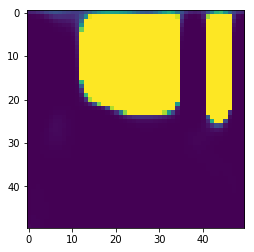

In [138]:
f,ax = plt.subplots()
ax.imshow(filt,vmax=np.percentile(filt.ravel(),75))

In [121]:
print(filt)

[[339.33922904 373.94456949 456.15500975 ... 739.64652189 492.07553716
  416.02510193]
 [ 27.52168842  30.88191299  49.45184061 ... 489.77205976  70.37725417
   27.62879148]
 [  1.07619032   1.23346545   2.79781956 ... 290.98725385   5.74984645
    0.8307915 ]
 ...
 [ 19.64462045  29.3802172   28.77297193 ...   9.91804812  10.35368861
   11.30625225]
 [ 28.75496044  35.1581104   29.43253712 ...   9.00736361  10.43122829
   15.57072707]
 [ 45.52244402  43.74286878  29.7267194  ...   8.15372099  10.41181779
   20.73092916]]
